# DEMO Python Notebook for **Time Series Analysis and Forecasting** with Air Passengers Data

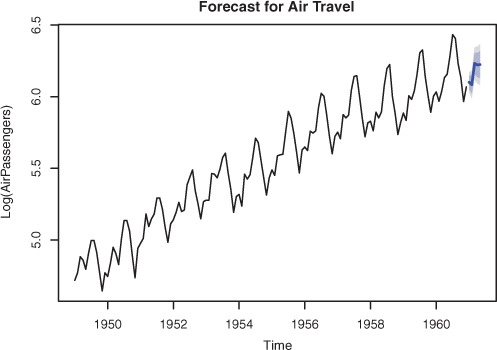

Any data recorded with some fixed interval of time is called as **time series data**. This fixed interval can be hourly, daily, monthly or yearly. e.g. hourly temp reading, daily changing fuel prices, monthly electricity bill, annul company profit report etc. In time series data, time will always be an *independent variable* and there can be one or many *dependent variable*.

**Time series forecasting** is the process of analyzing time series data using statistics and modeling to make predictions and inform strategic decision-making.  
It’s not always an exact prediction, and likelihood of forecasts can vary wildly—especially when dealing with the commonly fluctuating variables in time series data as well as factors outside our control.


**Example Data**:
+ We have a monthly time series data of the (international) **Air Passengers** of Pan Am Airline in the United Stades of America from 1 Jan 1949 to 1 Dec 1960.
+ Each row contains the air passenger number for a month of that particular year. The numbers were obtained from the Federal Aviation Administration.
+ The company used the data to predict future demand before ordering new aircraft and training aircrew.  

---  
Sources:
* [Kaggle](https://www.kaggle.com) Multiple Time Series Notebooks and Tutorials
* [Hyndman + Athanasopoulos](https://otexts.com/fpp3/) "Forecasting: Principles and Practice"
* [Jason Brownlee](https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/) "Introduction to Time Series Forecasting With Python
Discover How to Prepare Data and Develop Models to Predict the Future"

---
Author:
*   dr.daniel benninger  [Linkedin](https://www.linkedin.com/in/danielbenninger/)

History:
*  v3, January 2022, dbe --- adapted version for CAS BIA12
*  v4, April 2024, dbe   --- minor corrections for BINA FS24

## Setup Environment  - Load necessary Libraries and Functions

First, we need to import some libraries:  
* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* matplotlib : It’s plotting library, and we are going to use it for data visualization
* rcParams: To change the matplotlib properties like figure size
* seaborn: It’s a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics  

* statsmodels: Using statsmodels module classes and functions for time series analysis and forecasting
   * adfuller: Augmented Dickey-Fuller (ADF) Test
   * ACF/PACF: Auto Correlation Function / Partial Auto Correlation Function
   * ARIMA: Autoregressive Integrated Moving Average Model - ARIMA(p,d,q)
   * sm.tsa.seasonal.seasonal_decompose: Decomposition of Time Series

Make sure they are installed already before importing them

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

from pylab import rcParams

In [2]:
# configure plot area
rcParams['figure.figsize'] = 12, 6

## Load and Analyze Data

In [3]:
#load AirPassengers dataset from local directory
filePATH = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB06-Regression%2BTimeSeries/Python/"
fileNAME = "DATA_AirPassengers.csv"

df = pd.read_csv(filePATH+fileNAME)

print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df

Shape of the data=  (144, 2)
Column datatypes= 
 Month          object
#Passengers     int64
dtype: object


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Understanding The Data <a id ="31"></a>
* Dataframe 'df' contains the time series data. There are two columns `Month` and `Passengers`. Month column contains the value of month in that year and passenger column contains the number of air passenger for that particular month.
* As you may have noticed `Month` column datatype is *'Object'*, so we are going to convert it to *'datetime'*
* To make plotting easier, we set the index of pandas dataframe 'df' to the `Month` column so that it will act as *x-axis* and  `Passenger` column as *y-axis*

### Convert time axis column values/types

In [4]:
# convert Month from object to datetime
df['Month'] = pd.to_datetime(df.Month)

# change index values to Month values
df = df.set_index(df.Month)

# delete (original) Month column
df.drop('Month', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 #Passengers    int64
dtype: object


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Visualize the time series data

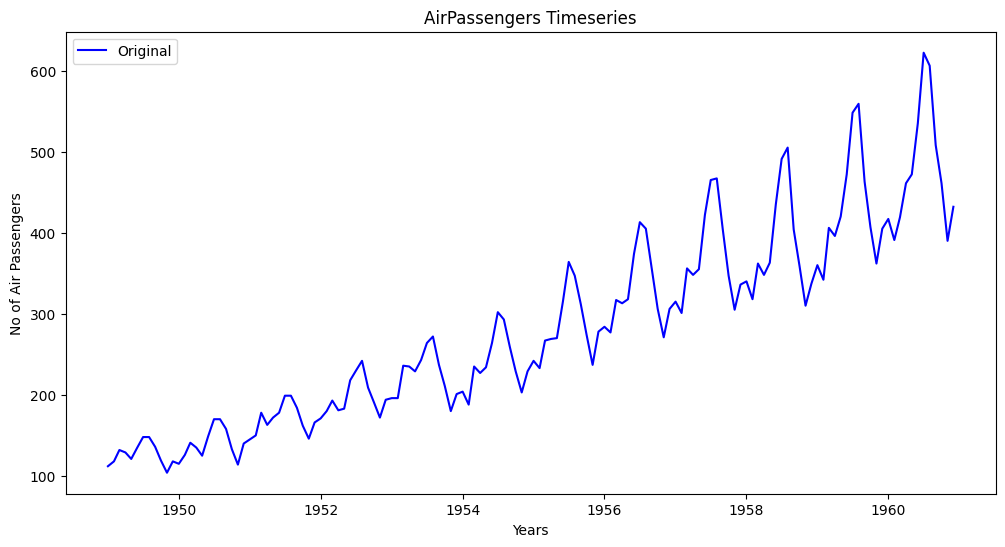

In [34]:
#Plot original AirPassengers time series

orig = plt.plot(df, color='blue',label='Original')

plt.title('AirPassengers Timeseries')
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')

plt.legend(loc='upper left')

plt.show(block=False)

## Time Series Analysis  
As name suggest its analysis of the time series data to identify the patterns in it. We will briefly explain the different techniques and test for time series data analysis.

### Decomposition of Time Series
Let's now use the decomposition technique to deconstruct the time series data into several component like **trend** and **seasonality** for visualization of time series characteristics.


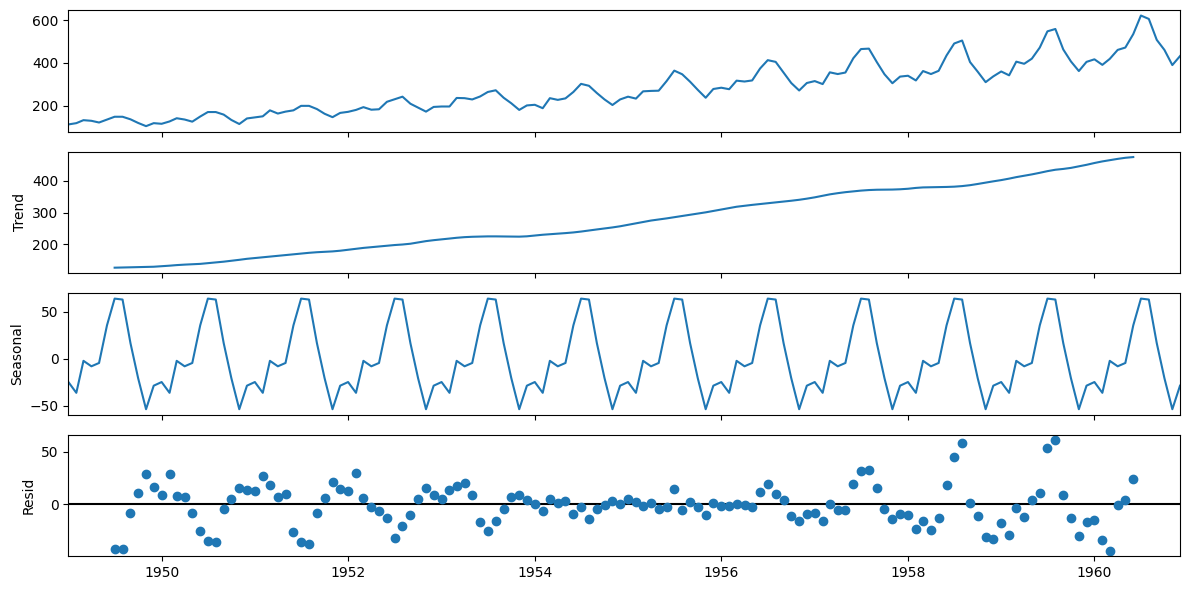

In [6]:
# We are going to use 'additive' model because it is quick to develop, fast to train, and provide interpretable patterns
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

fig = decomposition.plot()

### Test for Stationarity  
Easy way is to look at the plot and look for any obvious trend or seasonality. While working on real world data we can also use more sophisticated methods like *Rolling Statistic* and *Augmented Dickey Fuller (ADF)* test to check **stationarity** of the data.

#### Rolling Statistics  
In rolling statistics technique we define *a size of window to calculate the mean and standard deviation* throughout the series.

Note: For stationary series mean and standard deviation shouldn't change with time.

In [7]:
#Determing rolling statistics (mean + std)
rolmean = df.rolling(window=12).mean()           # moving/rolling MEAN
rolstd = df.rolling(window=12).std()             # moving/rolling STD

print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


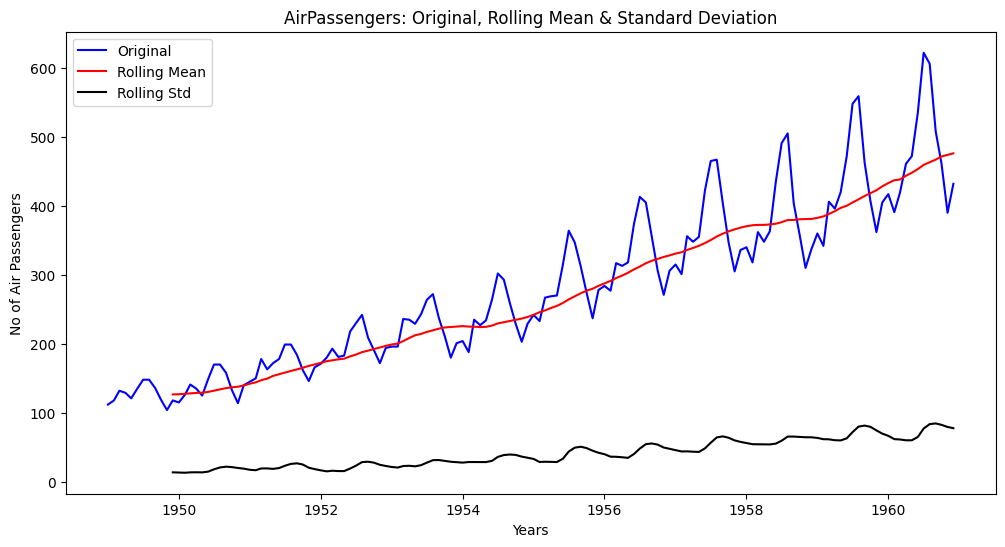

In [33]:
#Plot original timeseries together with Rolling Statistics
orig = plt.plot(df, color='blue',label='Original')

mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std  = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')

plt.title('AirPassengers: Original, Rolling Mean & Standard Deviation')
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')

plt.legend(loc='upper left')

plt.show(block=False)


---  
#### Augmented Dickey Fuller (ADF) Test
We won't go into the details of how this test works and concentrate more on how to interpret the result of this test to determine the stationarity of the series. **Augmented Dickey Fuller** ([ADF](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)) test will return **p-value** and **Test Statistics** output values:  

* **p-value > 0.05** : non-stationary
* **p-value <= 0.05**: stationary
* **Test statistics**: More negative this value more likely we have stationary series. Also, this value should be smaller than critical values(1%, 5%, 10%). For e.g. If test statistic is smaller than the 5% critical values, then we can say with 95% confidence that this is a stationary series

In [9]:
# define ADF stationarity test function for a time series
def stationarity_test(timeseries):
    # Augmented Dickey-Fuller (ADF) test
    print('Results of Augmented-Dickey-Fuller (ADF) Test\n')
    df_test = adfuller(timeseries)

    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value

    print(df_output)

In [10]:
# Lets test the stationarity score with original series data
series = df["#Passengers"].values

stationarity_test(series)

Results of Augmented-Dickey-Fuller (ADF) Test

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


> Though it's clear from visual observation that **it's not a stationary series**, but still lets have look at the Rolling Statistics and Augmented Dickey Fuller test results

> - **Rolling statistics**: Standard deviation has very less variation but mean is increasing continuously  
> - **Dickey Fuller Test**: Test statistic is way more than the critical values

---  
### Convert Non-Stationary Data to Stationary Data  
Accounting for the time series data characteristics like trend and seasonality is called as making data stationary. So by making the mean and variance of the time series constant, we will get the stationary data. Below are the few technique used for the same.

#### Differencing
Differencing technique helps to remove the trend and seasonality from time series data. Differencing is performed by subtracting the previous observation from the current observation.

The differenced data will contain one less data point than original data. So differencing actually reduces the number of observations and stabilize the mean of a time series.

```
difference = previous observation - current observation
```
After performing the differencing it's recommended to plot the data and  visualize the change. In case there is not sufficient improvement you can perform second order or even third order differencing.



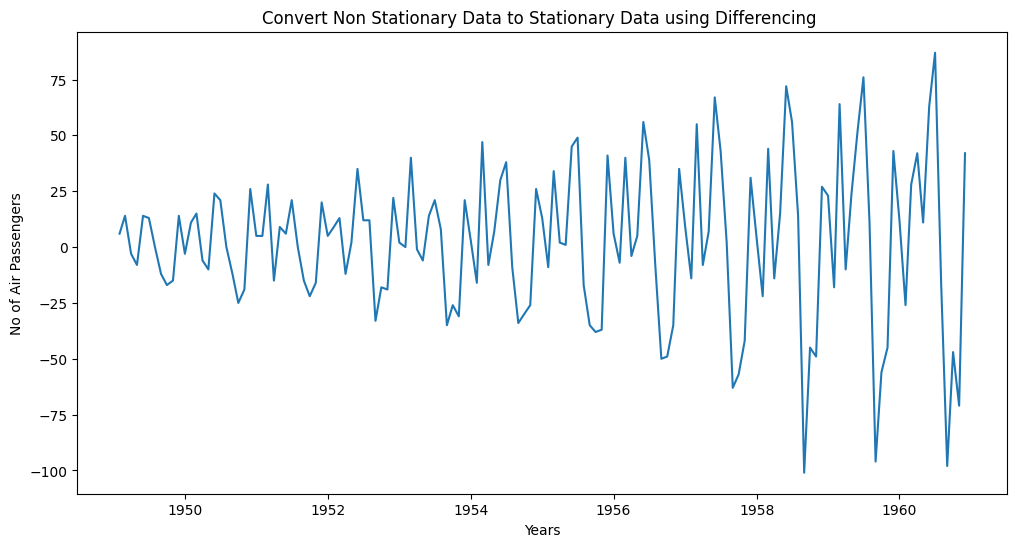

In [31]:
# First order differencing
df_diff = df.diff(periods = 1)

plt.plot(df_diff)

plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')

plt.show()

#### Transformation
A simple but often effective way to stabilize the variance across time is to apply a power transformation to the time series. *Log, square root, cube root* are most commonly used transformation techniques.

Most of the time you can pick the type of growth of the time series and accordingly choose the transformation method. E.g. *a time series that has a quadratic growth trend can be made linear* by taking the square root.

In case differencing don't work, you may first want to use one of above transformation technique to remove the variation from the series.

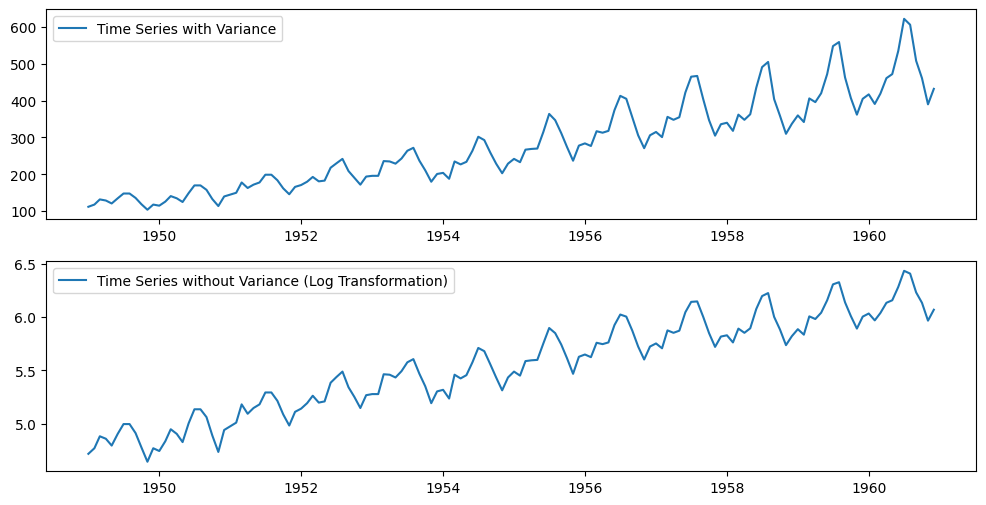

In [12]:
#Since variance is proportional to the levels, we are going to use the log transformation.
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend(loc='upper left')

plt.show()

Since log transformation has removed the variance from series, lets use this transformed data hence forward. Note that, Since we are using log transformation, we can use the exponential of the series to get the original scale back.
```
    df = exp(df_log)
```
Let cross-check the differencing method scores with this log transformed data again.

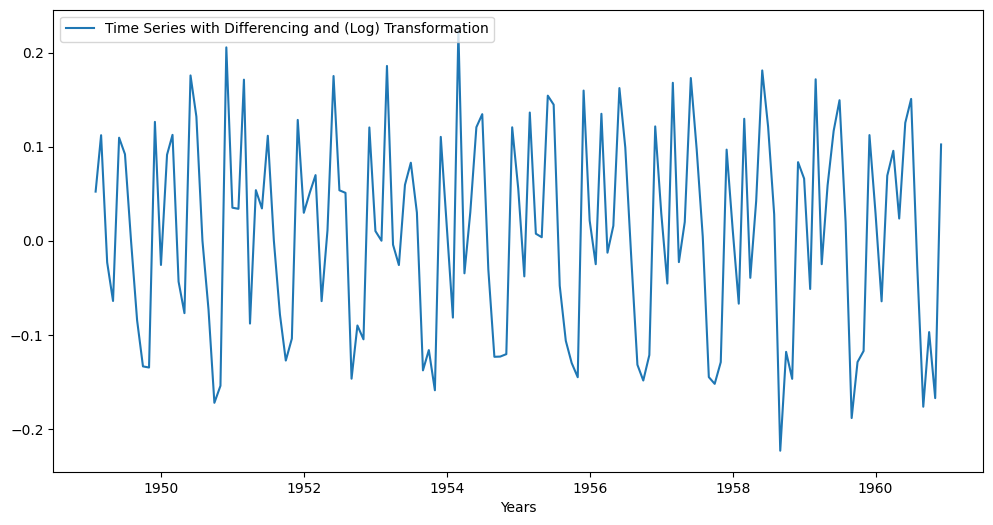

In [27]:
df_log = np.log(df)                    # (log) transformation
df_log_diff = df_log.diff(periods = 1) # First order differencing

plt.plot(df_log_diff, label= 'Time Series with Differencing and (Log) Transformation')
plt.xlabel('Years')

plt.legend(loc='upper left')

plt.show()

#### Moving Average (MA)

In moving averages technique, a new series is created by taking the averages of data points from original series. In this technique we can use two or more raw data points to calculate the average. This is also called as *'window width (w)'*.   

Once window width is decided, averages are calculated from start to the end for each set of w consecutive values, hence the name moving averages. It can also be used for time series forecasting.

Since we have time series data from 1 Jan 1949 to 1 Dec 1960, we will define a yearly window for moving average: **Window size = 12**.

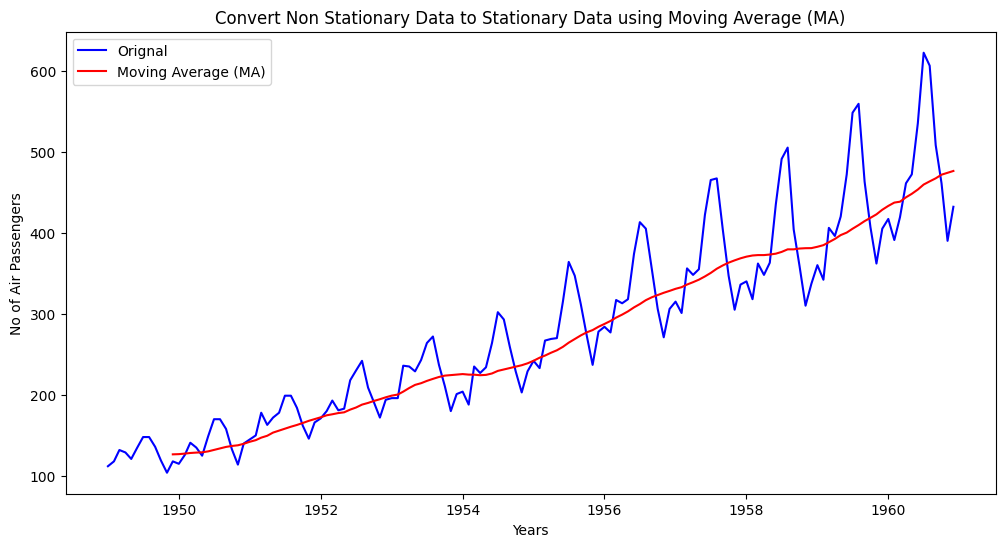

In [14]:
df_moving_avg = df.rolling(window = 12).mean()      # moving average

plt.plot(df, color= 'blue', label='Orignal')
plt.plot(df_moving_avg, color= 'red', label='Moving Average (MA)')

plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average (MA)')

plt.legend(loc='upper left')

> Note: You can also use **log transformed** data

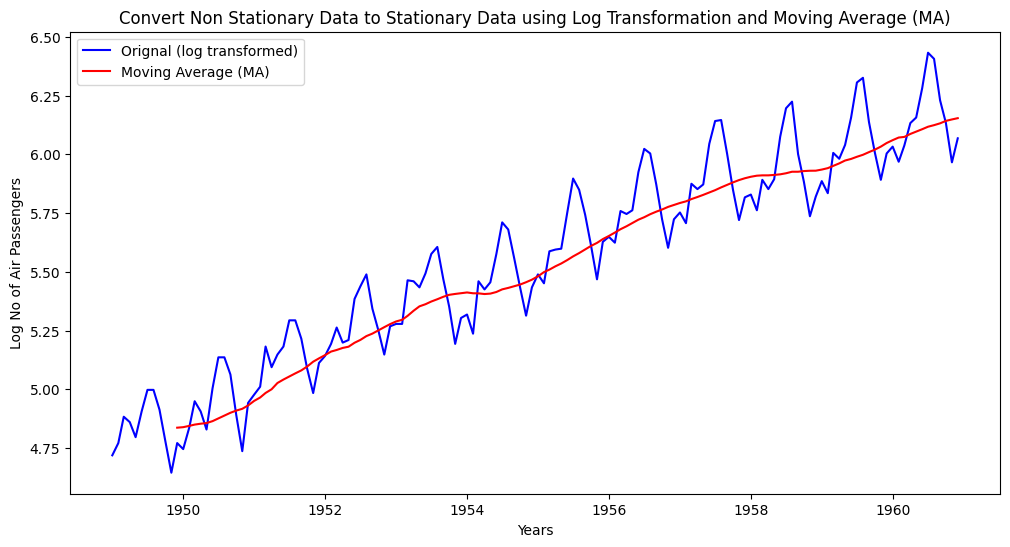

In [25]:
df_log = np.log(df)                                    # (log) transformation
df_log_moving_avg = df_log.rolling(window = 12).mean() # moving average with window width 12 months


plt.plot(df_log, color= 'blue', label='Orignal (log transformed)')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average (MA)')

plt.xlabel('Years')
plt.ylabel('Log No of Air Passengers')
plt.title('Convert Non Stationary Data to Stationary Data using Log Transformation and Moving Average (MA)')

plt.legend(loc='upper left')

> As you can see from above graph that data is more smooth without any variance. If we use the differencing technique with log transformed data and mean average data then we should get better stationarity scores

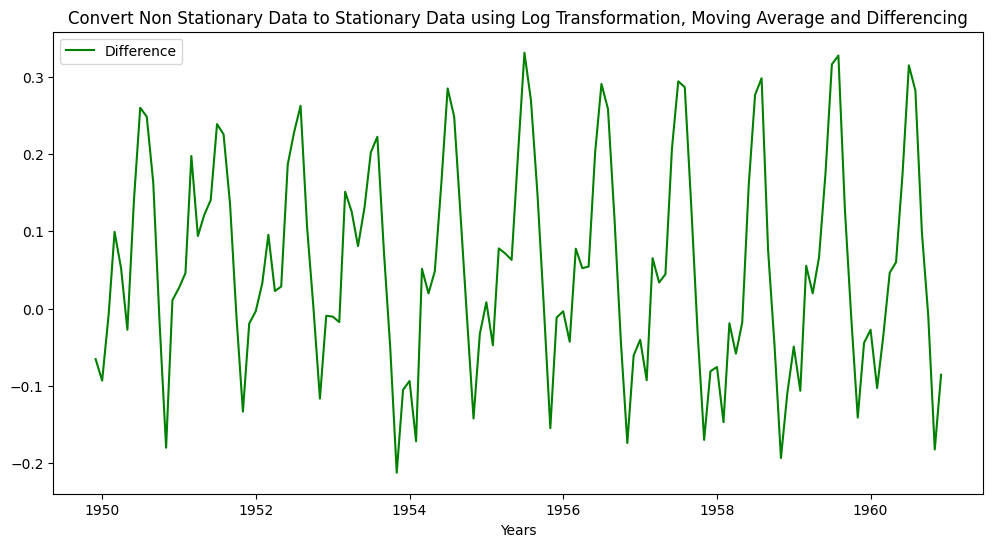

In [26]:
df_log_moving_avg_diff = df_log - df_log_moving_avg


# plt.plot(df_log, color= 'blue', label='Orignal (log transformed)')
# plt.plot(df_log_moving_avg, color= 'red', label='Moving Average (MA)')
plt.plot(df_log_moving_avg_diff, color= 'green', label='Difference')


plt.title('Convert Non Stationary Data to Stationary Data using Log Transformation, Moving Average and Differencing')
plt.xlabel('Years')

plt.legend(loc='upper left')

##### **Weighted Moving Averages**(WMA)
WMA is a technical indicator that assigns a greater weighting to the most recent data points, and less weighting to data points in the distant past.

The WMA is obtained by multiplying each number in the data set by a predetermined weight and summing up the resulting values. There can be many techniques for assigning weights.  

A popular one is *exponentially weighted moving average* where weights are assigned to all the previous values with a decay factor.


In order to increase the stationarity of the series lets try to use *Weighted Moving Average* (WMA) technique.  
Here we are going to use exponentially weighted moving average with parameter ‘halflife = 12’. This parameter defines the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

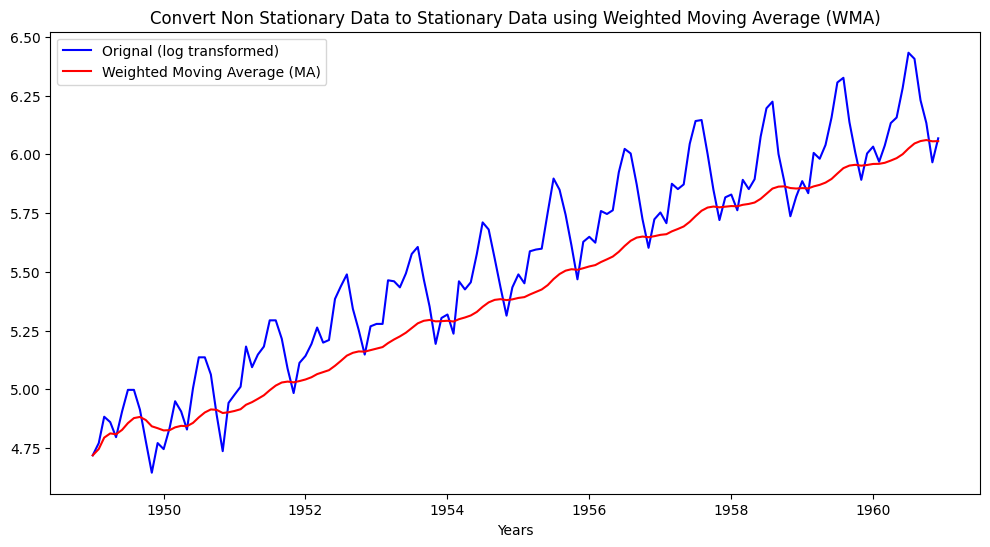

In [35]:
df_log_weighted_avg = df_log.ewm(halflife = 12).mean()


plt.plot(df_log, color= 'blue', label='Orignal (log transformed)')
plt.plot(df_log_weighted_avg, color = 'red', label='Weighted Moving Average (MA)')

plt.title('Convert Non Stationary Data to Stationary Data using Weighted Moving Average (WMA)')
plt.xlabel('Years')

plt.legend(loc='upper left')

> The WMA follow's No of Passenger values more closely than a corresponding *Simple Moving Average* which also results in more accurate trend direction.

##### **Centered Moving Averages**(CMA)  

In a centered moving average, the value of the moving average at time t is computed by centering the window around time t and averaging across the w values within the window.  

CMAs are very useful for visualizing the time series data.

*For example, a center moving average with a window of 3 would be calculated as*
  ```
  CMA(t) = mean(t-1, t, t+1)
  ```

##### **Trailing Moving Averages**(TMA)   

In trailing moving average, instead of averaging over a window that is centered around a time period of interest, it simply takes the average of the last w values.   

TMA are useful for forecasting.  

*For example, a trailing moving average with a window of 3 would be calculated as*
 ```
 TMA(t) = mean(t-2, t-1, t)
 ```

#### Decomposition of Time Series

And finally, let's now use the **decomposition technique** to deconstruct the *log transformed, weighted moving average* time series data

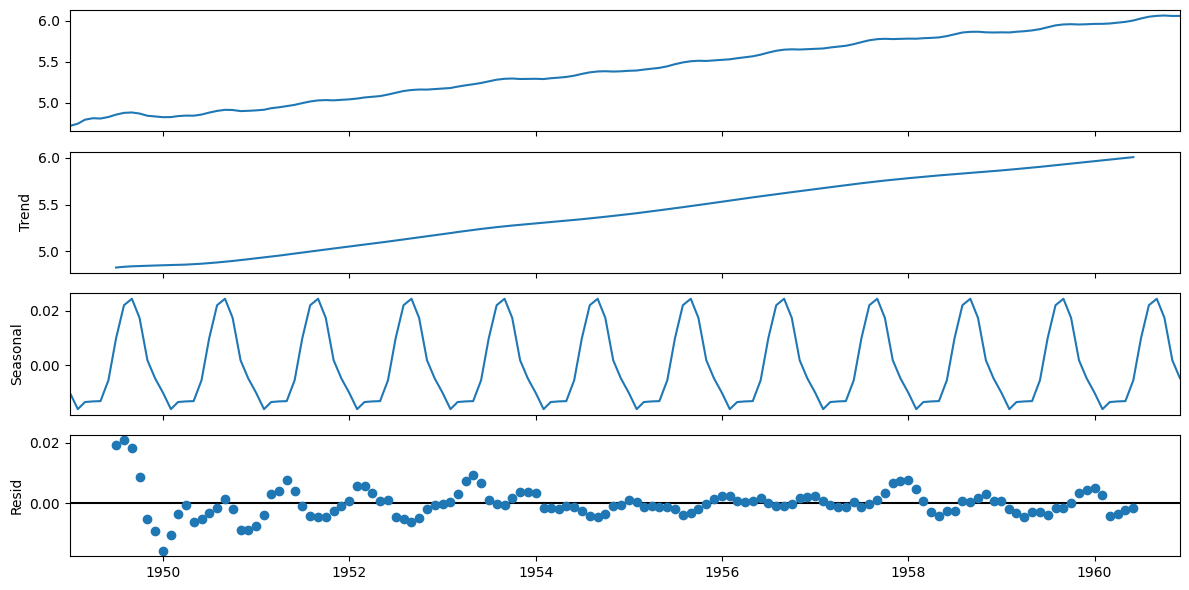

In [36]:
decomposition = sm.tsa.seasonal_decompose(df_log_weighted_avg, model='additive')

fig = decomposition.plot()

---  
## Time Series Forecasting

Forecasting refers to the future predictions based on the time series data analysis. Below are the steps performed during time series forecasting

* Step 1: Understand the time series characteristics like trend, seasonality etc
* Step 2: Do the analysis and identify the best method to make the time series stationary
* Step 3: Note down the transformation steps performed to make the time series stationary and make sure that the reverse transformation of data is possible to get the original scale back
* Step 4: Based on data analysis choose the appropriate model for time series forecasting
* Step 5: We can assess the performance of a model by applying simple metrics such as residual sum of squares(RSS). Make sure to use whole data for prediction.
* Step 6: Now we will have an array of predictions which are in transformed scale. We just need to apply the reverse transformation to get the prediction values in original scale.
* Step 7: At the end we can do the future forecasting and get the future forecasted values in original scale.

<br>

### **Models used for Time Series Forecasting**
* Autoregression (AR)
* Moving Average (MA)
* Autoregressive Moving Average (ARMA)
* Autoregressive Integrated Moving Average (ARIMA)


### ARIMA <a id ="25"></a>
* ARIMA stands for Auto-Regressive Integrated Moving Averages. It is actually a combination of AR and MA model.
* ARIMA has three parameters 'p' for the order of Auto-Regressive (AR) part, 'q' for the order of Moving Average (MA) part and 'd' for the order of Integrated part.

#### Auto-Regressive (AR) Model: <a id ="26"></a>
* As the name indicates, its the regression of the variables against itself. In this model linear combination of the past values are used to forecast the future values.
* To figure out the order of AR model we will use PACF function

#### Integration(I): <a id ="27"></a>
* Uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
* Most of the time value of d = 1, means first order of difference.

#### Moving Average (MA) Model: <a id ="28"></a>
* Rather than using past values of the forecast variable in a regression, a moving average model uses linear combination of past forecast errors
* To figure out the order of MA model we will use ACF function

### Forecasting Parametrization<a id ="34"></a>
* Though using residual values gives us very good results, but it's relatively difficult to add noise and seasonality back into predicted residuals in this case.
* So we are going to make model on the time series (**df_log_diff**), where we have used log transformation and differencing technique. This is one of the most popular and beginner-friendly technique. As per our time series analysis 'df_log_diff' is not a perfectly stationary series, that's why we are going to use statistical models like ARIMA to forecast the data.  

<br>
Remember that ARIMA model uses three parameters, 'p' for the order of Auto-Regressive (AR) part, 'q' for the order of Moving Average (MA) part and 'd' for the order of integrated part.  

+ We are going to use **d=1** but to find the value for **p** and **q** lets plot ACF and PACF.  
+ Since we are using d=1, first order of differencing will be performed on given series. Since first value of time series don't have any value to subtract from resulting series will have one less value from original series


### Auto-Correlation Function (ACF) and Partial-Auto-Correlation Function (PACF) Plots  

#### Auto Correlation Function (ACF) <a id ="21"></a>
* ACF tells you how correlated points are with each other, based on how many time steps they are separated by.
* Now to understand it better lets consider above example of fish prices. Let's try to find the correlation between fish price for current month P(t) and two months ago P(t-2). Important thing to note that, fish price of two months ago can directly affect the today's fish price or it can indirectly affect the fish price through last months price P(t-1)
* So ACF consider the direct as well indirect effect between the points while determining the correlation

#### Partial Auto Correlation Function (PACF) <a id ="22"></a>
* Unlike ACF, PACF only consider the direct effect between the points while determining the correlation
* In case of above fish price example PACF will determine the correlation between fish price for current month P(t) and two months ago P(t-2) by considering only P(t) and P(t-2) and ignoring P(t-1)

To figure out the **order of AR model (p)** we will **use PACF function**:  
- p = the lag value where the PACF chart crosses the upper confidence interval for the first time


To figure out the **order of MA model (q)** we will **use ACF function**:   
- q = the lag value where the ACF chart crosses the upper confidence interval for the first time

In [38]:
df_log      = np.log(df)                # (log) transformation
df_log_diff = df_log.diff(periods = 1)  # First order differencing
df_log_diff.dropna(inplace = True)      # drop NA value

In [ ]:
# compute ACF, PACF
from statsmodels.tsa.stattools import acf, pacf
lag_acf  = acf (df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')



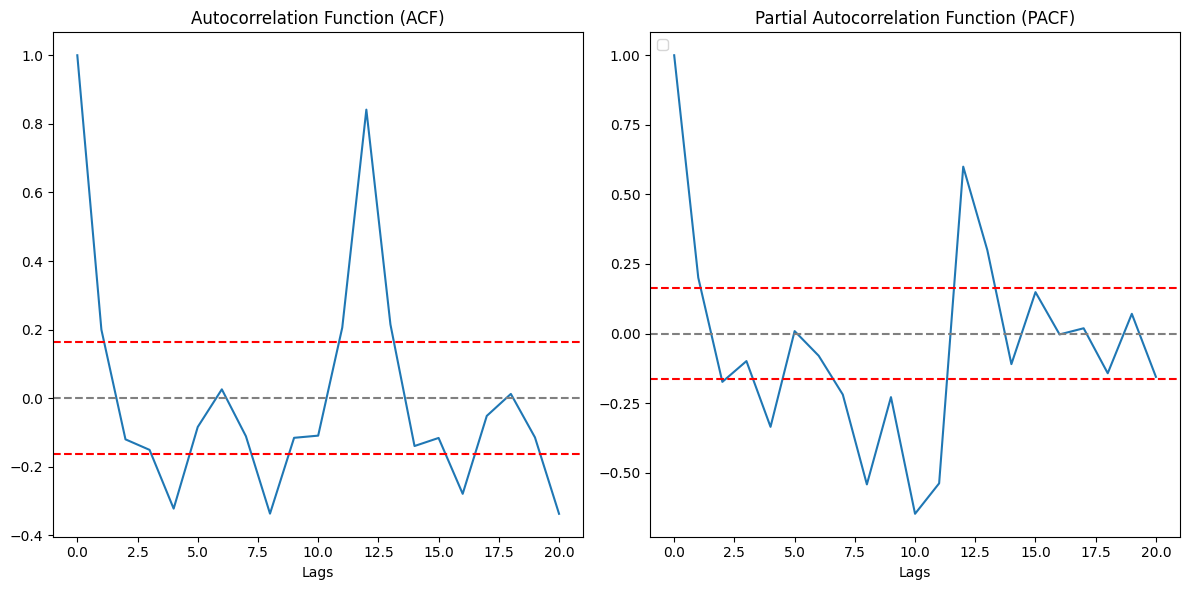

In [39]:
# Plot ACF:
# ---------
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')

# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function (ACF)')

# Plot PACF:
# ----------
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.legend(loc='upper left')

# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()

> From above graph its clear that **p=2** and **q=2**  

> Now we have the ARIMA parameters values, lets make different ARIMA models considering individual as well as combined effects.  

> We will also print the **Residual Sum of Square** (RSS) metric for each. Please note that here RSS is for the values of residuals and not actual series.

### The AR (auto-regressive) Model
Since 'q' is MA model parameter we will keep its value as '0'.

In [43]:
# freq = 'MS' > The frequency of the time-series MS = calendar month begin
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use

model      = ARIMA(df_log, order=(2, 1, 0), freq = 'MS')
results_AR = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


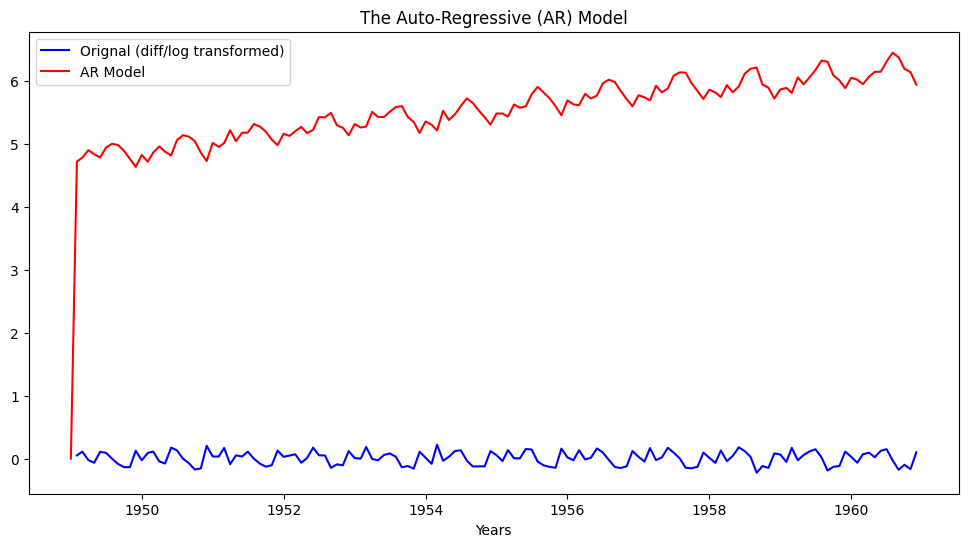

In [44]:

plt.plot(df_log_diff,color= 'blue', label='Orignal (diff/log transformed)')
plt.plot(results_AR.fittedvalues, color = 'red', label='AR Model')

plt.title('The Auto-Regressive (AR) Model')
plt.xlabel('Years')

plt.legend()

In [45]:
RSS_AR = sum((results_AR.fittedvalues.values[1:143]-df_log["#Passengers"].values[1:143])**2)
print(RSS_AR)

1.4978279003017239


### The MA (moving average) Model
Since 'p' is AR model parameter we will keep its value as '0'.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


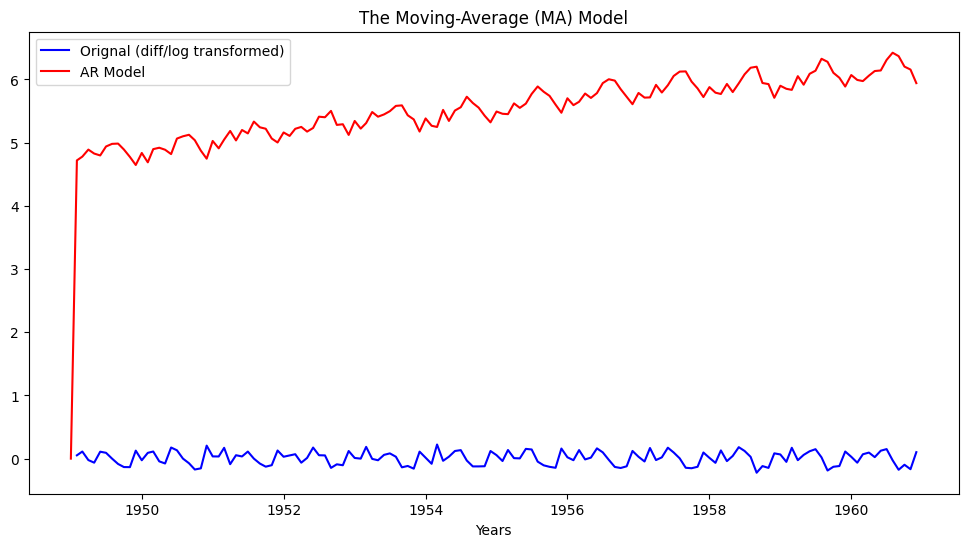

In [47]:
model      = ARIMA(df_log, order=(0, 1, 2), freq = 'MS')
results_MA = model.fit()


plt.plot(df_log_diff,color= 'blue', label='Orignal (diff/log transformed)')
plt.plot(results_MA.fittedvalues, color = 'red', label='AR Model')

plt.title('The Moving-Average (MA) Model')
plt.xlabel('Years')

plt.legend()

In [48]:
RSS_MA = sum((results_MA.fittedvalues.values[1:143]-df_log["#Passengers"].values[1:143])**2)
print(RSS_MA)

1.4724131459175844


### The Combined (ARIMA) Model  
Using the parameters p=2, d=1 and q=2, hence ARIMA(2,1,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


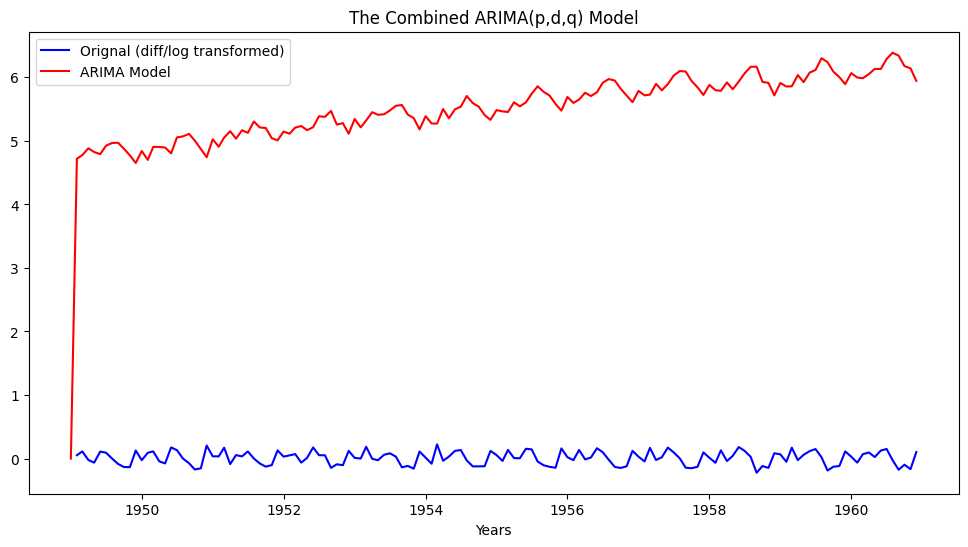

In [51]:
model         = ARIMA(df_log, order=(2, 1, 2), freq = 'MS')
results_ARIMA = model.fit()


plt.plot(df_log_diff,color= 'blue', label='Orignal (diff/log transformed)')
plt.plot(results_ARIMA.fittedvalues, color = 'red', label='ARIMA Model')

plt.title('The Combined ARIMA(p,d,q) Model')
plt.xlabel('Years')

plt.legend()

In [52]:
RSS_ARIMA = sum((results_ARIMA.fittedvalues.values[1:143]-df_log["#Passengers"].values[1:143])**2)
print(RSS_ARIMA)

1.3625569528122172


---  
### Prediction and Reverse Transformation  
So we will go ahead with the combined ARIMA model and use it for **predictions**  

* We will create a separate series of predicted values using ARIMA model
* Reverse transform the predicted values to get the original scale back
* Compare the predicted values with original values and plot them

In [53]:
# Create a separate series of predicted values
predictions_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

Total no of predictions:  144


Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824421
dtype: float64

Since we are using first order of differencing(d =1), there is no prediction available for first value (1949-02-01) of original series. In order to remove *differencing transformation* from the prediction values we are going to add these differences consecutively to the base number.   

An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. We are going to use pandas `cumsum()` function for it.

In [54]:
predictions_diff_cumsum = predictions_diff.cumsum()

predictions_diff_cumsum.head()

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378100
1949-05-01    19.202522
dtype: float64

Above values once added to the base number will completely **remove** the **differencing** transformation.  

For this, lets create a series with all values as base number and add the `predictions_diff_cumsum` to it.

In [57]:
predictions_log = pd.Series(df_log['#Passengers'].iloc[0], index=df_log.index) # Series of base number
predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)

predictions_log.head()

Month
1949-01-01     4.718499
1949-02-01     9.436998
1949-03-01    14.213383
1949-04-01    19.096599
1949-05-01    23.921020
dtype: float64

So as of now we have removed the differencing transformation, now lets **remove** the **log** transformation to get the original scale back.

In [58]:
predictions = np.exp(predictions_log)

# Original and Prediction plot
plt.plot(df, color ="blue", label="Original")
plt.plot(predictions, color="red", label="Prediction")


plt.title('AirPassengers - Original and Predicted Timeseries')
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')

plt.legend()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x7b9681121090> (for post_execute):


/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2127: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin


OverflowError: cannot convert float infinity to integer

OverflowError: cannot convert float infinity to integer

<Figure size 1200x600 with 1 Axes>

In [60]:
# Original and Prediction data table
df_predictions =pd.DataFrame(predictions, columns=['Predicted Values'])
pd.concat([df,df_predictions],axis =1)

,#Passengers,Predicted Values
Month,,
1949-01-01,112,1.120000e+02
1949-02-01,118,1.254400e+04
1949-03-01,132,1.488654e+06
1949-04-01,129,1.965838e+08
1949-05-01,121,2.447751e+10
...,...,...
1960-08-01,606,inf
1960-09-01,508,inf
1960-10-01,461,inf


---  
More Reference Material as below:
* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
* https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima/notebook
* https://maelfabien.github.io/statistics/TimeSeries3/#
* https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
* https://www.kaggle.com/chirag19/time-series-analysis-with-python-beginner/notebook
* https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima/notebook
* https://www.youtube.com/watch?v=gj4L2isnOf8&t=1167s
* https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3
* https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621
* https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/
* https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
